In [15]:
import pandas as pd

In [17]:
train=pd.read_csv("train.csv")
stopw=pd.read_csv("stopword.csv")
train['target'].value_counts()

0    1213
1    1187
Name: target, dtype: int64

In [100]:
stopwords=[]
for i in (stopw['Stopwords']):
    stopwords.append(i)

In [101]:
corpus=[]
for i in train['tweet']:
    review=i.split()
    review=[word for word in review if word not in stopwords]
    review=' '.join(review)
    corpus.append(review)

In [102]:
# from sklearn.feature_extraction.text import CountVectorizer    
# cv=CountVectorizer(max_features=3000)
from sklearn.feature_extraction.text import TfidfVectorizer
max_feature_num = 10000
train_vectorizer = TfidfVectorizer(max_features=max_feature_num)
X=cv.fit_transform(corpus).toarray()
# cv.vocabulary_
Y=train['target']

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [104]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
dtc_probs = classifier.predict_proba(X_test)
dtc_probs=dtc_probs[:,1]

In [105]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
print("confusion matrix")
print(cm)
print('Accuracy score: {}'.format(accuracy_score(y_test, pred)))
print('Precision score: {}'.format(precision_score(y_test, pred)))
print('F1 score: {}'.format(f1_score(y_test, pred)))
print('Recall score: {}'.format(recall_score(y_test, pred)))

confusion matrix
[[198  95]
 [ 55 252]]
Accuracy score: 0.75
Precision score: 0.7262247838616714
F1 score: 0.7706422018348624
Recall score: 0.8208469055374593


Classifier: ROC AUC=0.761


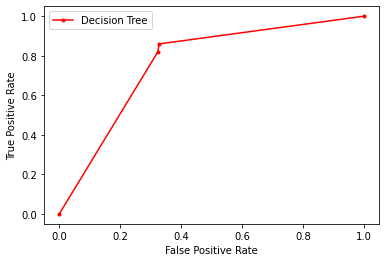

In [106]:
# submission={
#     'id':data['id'],
#     'target':test_pred,
#     'score':dtc_probs,
# }

# submission=pd.DataFrame(submission)
# submission.to_csv("subt.csv")
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
lr_auc = roc_auc_score(y_test, dtc_probs)
# summarize scores
print('Classifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, dtc_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, 'r',marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
kf = KFold(n_splits=4)
mae_train = []
mae_test = []

In [107]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
dtc_probs = classifier.predict_proba(X_test)
dtc_probs=dtc_probs[:,1]

In [108]:
from sklearn.metrics import accuracy_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
print("confusion matrix")
print(cm)
print('Accuracy score: {}'.format(accuracy_score(y_test, pred)))
print('Precision score: {}'.format(precision_score(y_test, pred)))
print('F1 score: {}'.format(f1_score(y_test, pred)))
print('Recall score: {}'.format(recall_score(y_test, pred)))

confusion matrix
[[265  28]
 [ 70 237]]
Accuracy score: 0.8366666666666667
Precision score: 0.8943396226415095
F1 score: 0.8286713286713288
Recall score: 0.7719869706840391


Classifier: ROC AUC=0.907


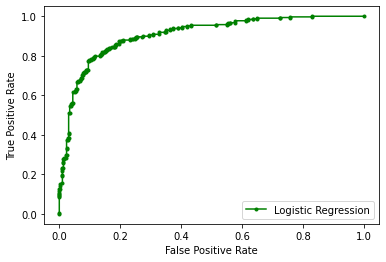

In [109]:
# submission={
#     'id':data['id'],
#     'target':test_pred,
#     'score':dtc_probs,
# }

# submission=pd.DataFrame(submission)
# submission.to_csv("subt.csv")
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
lr_auc = roc_auc_score(y_test, dtc_probs)
# summarize scores
print('Classifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, dtc_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr,'g', marker='.', label='Logistic Regression')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
kf = KFold(n_splits=4)
mae_train = []
mae_test = []

In [110]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(classifier)
model.fit(X_train,y_train)
pred=model.predict(X_test)
dtc_probs = model.predict_proba(X_test)
dtc_probs=dtc_probs[:,1]

In [111]:
from sklearn.metrics import accuracy_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
print("confusion matrix")
print(cm)
print('Accuracy score: {}'.format(accuracy_score(y_test, pred)))
print('Precision score: {}'.format(precision_score(y_test, pred)))
print('F1 score: {}'.format(f1_score(y_test, pred)))
print('Recall score: {}'.format(recall_score(y_test, pred)))

confusion matrix
[[263  30]
 [ 71 236]]
Accuracy score: 0.8316666666666667
Precision score: 0.8872180451127819
F1 score: 0.8237347294938918
Recall score: 0.7687296416938111


Classifier: ROC AUC=0.910


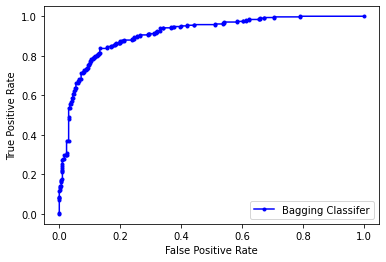

In [112]:
# submission={
#     'id':data['id'],
#     'target':test_pred,
#     'score':dtc_probs,
# }

# submission=pd.DataFrame(submission)
# submission.to_csv("subt.csv")
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
lr_auc = roc_auc_score(y_test, dtc_probs)
# summarize scores
print('Classifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, dtc_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, 'b',marker='.', label='Bagging Classifer')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
kf = KFold(n_splits=4)
mae_train = []
mae_test = []